In [1]:
#importing the necessary libraries
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(rc={'figure.figsize':(10,6)})

In [2]:
#loading the dataset

data=pd.read_csv("emails.csv")
data.sample(3)

,Email No.,the,to,ect,and,for,of,a,you,hou,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
3465,Email 3466,26,29,7,18,13,21,237,18,1,...,0,0,0,0,0,1,0,0,0,0
3082,Email 3083,0,1,1,1,1,0,9,1,0,...,0,0,0,0,0,0,0,0,0,1
4193,Email 4194,0,0,1,0,0,0,5,0,0,...,0,0,0,0,0,0,0,0,0,0


### Data Wrangling

In [3]:
data.shape

(5172, 3002)

In [4]:
data.duplicated().sum()

0

In [5]:
for columns in data.columns:
    if data[columns].isnull().sum() !=0:
        print(columns)

print("No nulls in dataset")

No nulls in dataset


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5172 entries, 0 to 5171
Columns: 3002 entries, Email No. to Prediction
dtypes: int64(3001), object(1)
memory usage: 118.5+ MB


In [7]:
data['Prediction']=data['Prediction'].astype('category')

### Data Visualization

In [8]:
features=[]
for col in data.columns:
    if data[col].dtype=='int64':
        features.append(col)

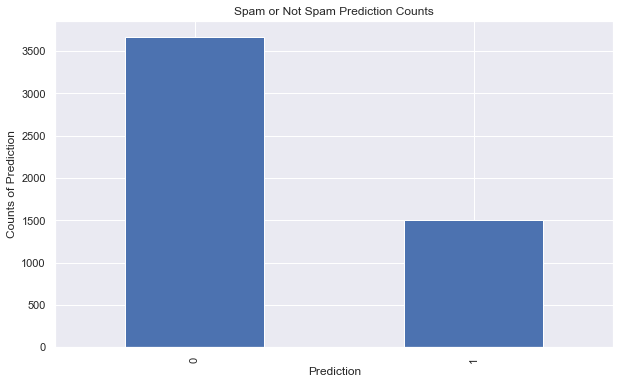

In [9]:
data['Prediction'].value_counts().plot(kind='bar')
plt.xlabel('Prediction')
plt.ylabel('Counts of Prediction')
plt.title('Spam or Not Spam Prediction Counts');

In [10]:
data.describe()

,the,to,ect,and,for,of,a,you,hou,in,...,enhancements,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry
count,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,...,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000
mean,6.640565,6.188128,5.143852,3.075599,3.124710,2.627030,55.517401,2.466551,2.024362,10.600155,...,0.005607,0.005027,0.012568,0.010634,0.098028,0.004254,0.006574,0.004060,0.914733,0.006961
std,11.745009,9.534576,14.101142,6.045970,4.680522,6.229845,87.574172,4.314444,6.967878,19.281892,...,0.192108,0.105788,0.199682,0.116693,0.569532,0.096252,0.138908,0.072145,2.780203,0.098086
min,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,12.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.000000,3.000000,1.000000,1.000000,2.000000,1.000000,28.000000,1.000000,0.000000,5.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,8.000000,7.000000,4.000000,3.000000,4.000000,2.000000,62.250000,3.000000,1.000000,12.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,210.000000,132.000000,344.000000,89.000000,47.000000,77.000000,1898.000000,70.000000,167.000000,223.000000,...,10.000000,4.000000,7.000000,2.000000,12.000000,3.000000,4.000000,3.000000,114.000000,4.000000


##### Since there are over 3000 columns, I will only be visualizing the top 10 three letter characters that show up the most.

In [11]:
three_letters=[]
for col in features:
    if len(col)==3:
        three_letters.append(col)



analysis_data=data[three_letters]

In [12]:
Top10_threeletters=analysis_data.select_dtypes('int').sum().sort_values(ascending=False).head(10)


analysis_col=['the', 'ect', 'for', 'and', 'you', 'hou', 'com', 'our', 'his', 'her']

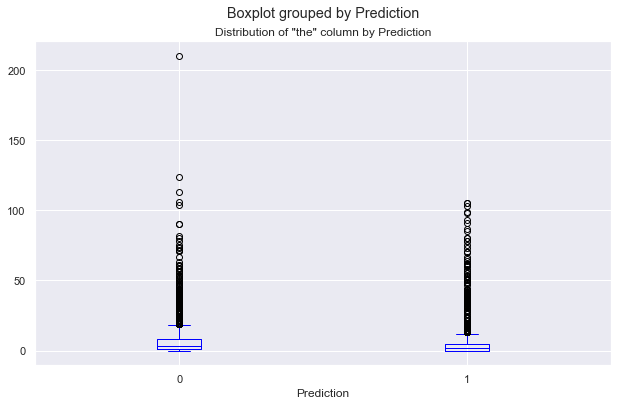

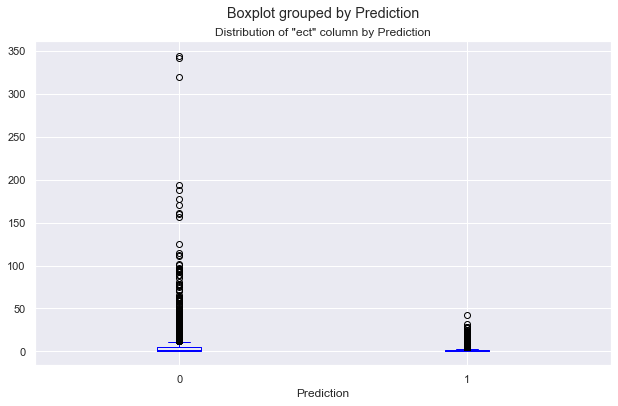

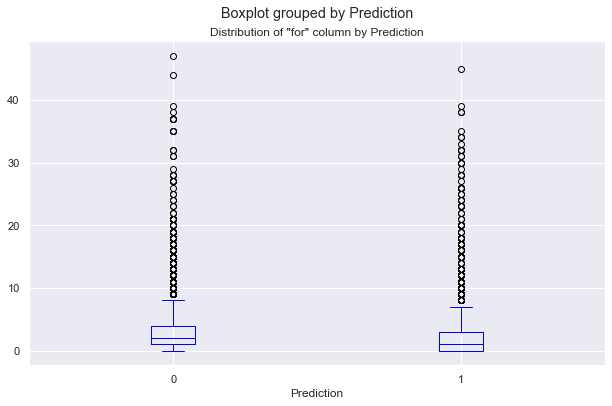

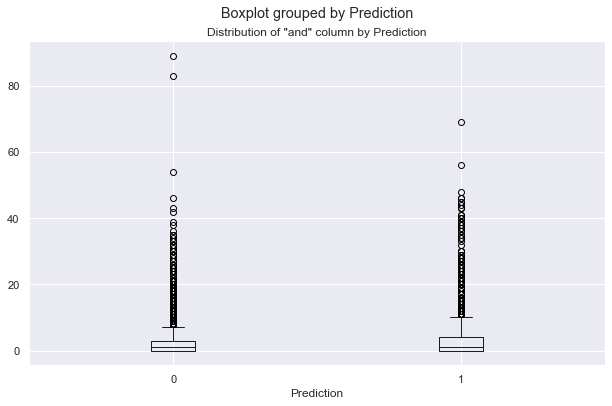

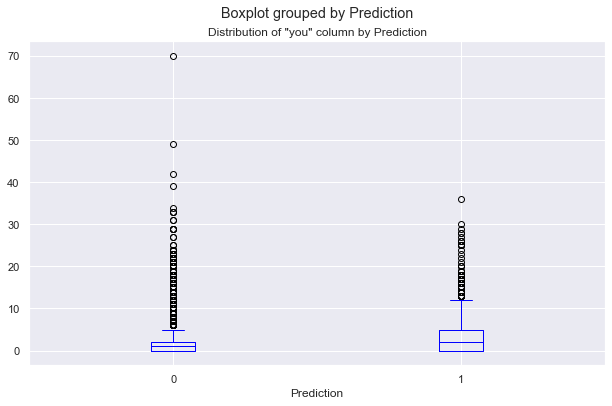

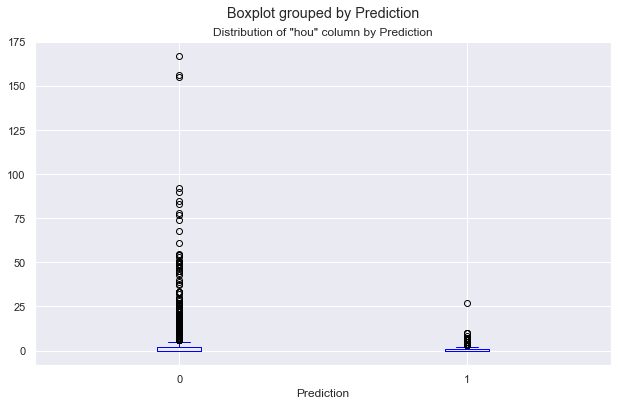

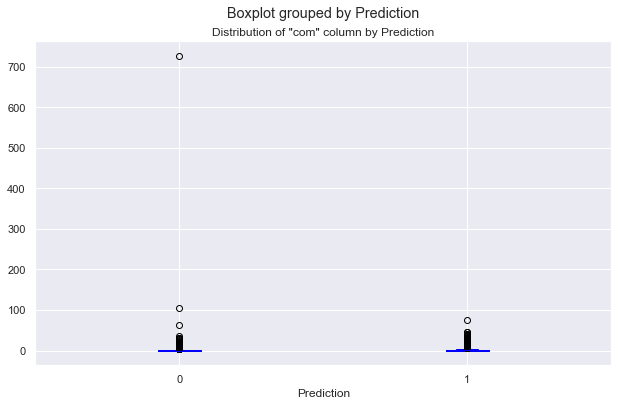

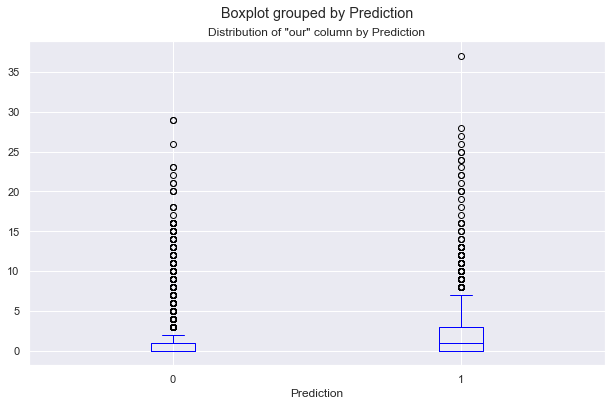

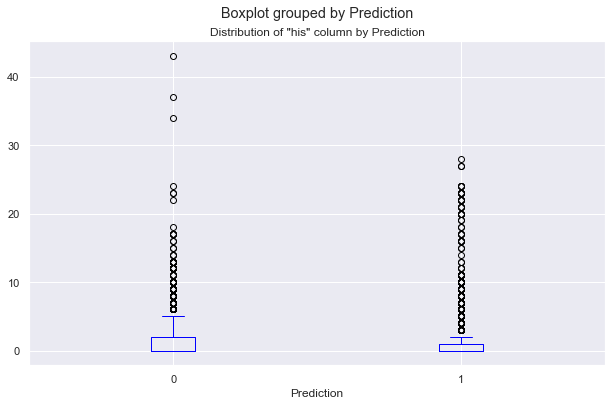

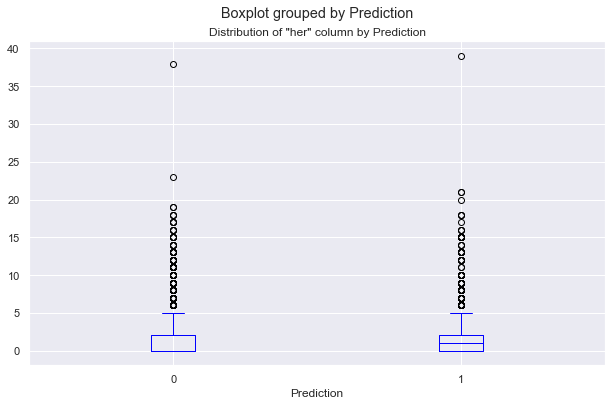

In [16]:
for col in analysis_col:
    data.boxplot(column=col,by="Prediction",color='Blue')
    plt.title(f'Distribution of "{col}" column by Prediction')

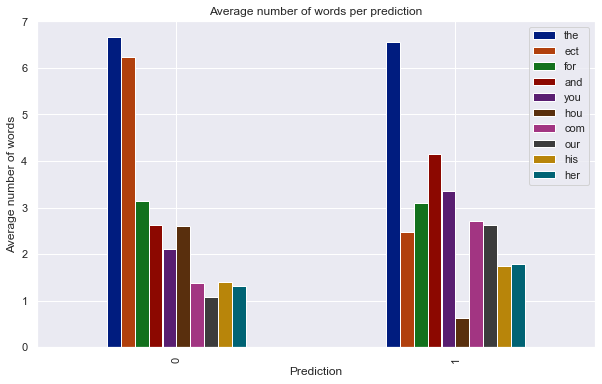

In [14]:
cols=['the', 'ect', 'for', 'and', 'you', 'hou', 'com', 'our', 'his', 'her','Prediction']

color=sns.color_palette("dark")
data[cols].groupby('Prediction').mean().plot(kind='bar',color=color)
plt.ylabel("Average number of words")
plt.title("Average number of words per prediction");

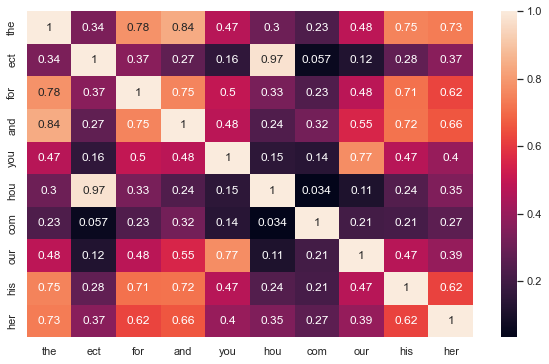

In [15]:
sns.heatmap(data[cols].corr(),annot=True);

##### Multicollinearity amongst several variables.